In [505]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score, log_loss, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import RandomOverSampler, ADASYN, SMOTE
from mlxtend.classifier import StackingClassifier
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
pd.options.display.max_columns = 200

In [506]:
df = pd.read_csv('online_shoppers_intention.csv')

In [507]:
to_dummy = ['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType']
not_dummy = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues','SpecialDay','Weekend']

for vari in to_dummy:
    df = pd.concat([df, pd.get_dummies(df[vari],drop_first=True,prefix=vari)], axis=1)
    df.drop(vari, axis=1, inplace=True)

In [508]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,False,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,False,False,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,False,False,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,False,False,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,True,False,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [509]:
df.Revenue.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [510]:
X = df.drop(['Revenue'],axis=1)
y = df.Revenue

In [529]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

#X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.2, random_state=12345)
#X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.5, random_state=12345)

In [530]:
std = StandardScaler()
std.fit(X_train)
X_train_st = std.transform(X_train)
X_test_st = std.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [513]:
X_train_st_Original = X_train_st
X_test_st_Original = X_test_st
y_train_Original = y_train
y_test_Original = y_test

ros = RandomOverSampler(random_state=0)

sample_dict = {}

X_train_st_Upsample, y_train_Upsample = ros.fit_sample(X_train_st,y_train)
X_train_st_Smote, y_train_Smote = SMOTE(random_state=42).fit_sample(X_train_st,y_train)
X_train_st_ADASYN, y_train_ADASYN = ADASYN(random_state=42).fit_sample(X_train_st,y_train)

In [514]:
y.value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

In [519]:
model_dict = {
    'Logistic Regression': [LogisticRegression(random_state=0, solver='lbfgs', max_iter=2000),
            {
                #'multi_class': ['ovr', 'multinomial', 'auto'], 
                'C':list(10**np.linspace(-3,3,10))
            }
           ],
    'Random Forest': [RandomForestClassifier(n_estimators=1000, max_depth=20,random_state=0),
            {
                'criterion': ['entropy','gini'], 
                'max_depth': [None], 
                'min_samples_split': [2,3], 
                'max_features': ['sqrt']}
           ],
    'Naive Bayes': [GaussianNB(),
            {}
           ],
    'K-Nearest-Neighbors': [KNeighborsClassifier(),
           {
                'n_neighbors': [3,5,11,21] #list(np.linspace(3,31,15).astype(int)),
                #'p': [1,2]
           }
           ]
#            ],
#     'svm': [SVC(gamma = 'scale'),
#            {
#                 'kernel': ['linear'], # 'poly', 'rbf', 'sigmoid']
#                 'C': list(10**np.linspace(-1,1,3)),
#                 'probability': [True]
#            }
#            ]
}

model_dict_simple = {
    'Logistic Regression': [LogisticRegression(random_state=0, solver='lbfgs', max_iter=2000),{}],
    'Random Forest': [RandomForestClassifier(random_state=0, n_estimators=200),{}],
    'Naive Bayes': [GaussianNB(),{}],
    'K-Nearest-Neighbors': [KNeighborsClassifier(),{}],
    'Support Vector Classifier': [SVC(random_state=0,probability=True),{}]
}

sample_list = ['Original', 'Upsample', 'Smote', 'ADASYN']

In [520]:
fit_dict = {}
cv_count = 3

for sample_style in sample_list:
    print(f'sample_style is {sample_style}')
    fit_dict[sample_style] = {}
    for nickname, model in model_dict.items():
        print(f'nickname is {nickname}')
        fit = GridSearchCV(model[0],model[1],cv=cv_count,scoring='roc_auc',iid=False,n_jobs = -1,verbose=1)
        exec('fit.fit(X_train_st_' + sample_style + ', y_train_' + sample_style + ').best_estimator_')
        fit_dict[sample_style][nickname] = fit
        
with open('fit_dict.pkl', 'wb') as handle:
    pickle.dump(fit_dict, handle)

sample_style is Original
nickname is Logistic Regression
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


nickname is Random Forest
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   59.2s finished


nickname is Naive Bayes
Fitting 3 folds for each of 1 candidates, totalling 3 fits
nickname is K-Nearest-Neighbors
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   32.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


sample_style is Upsample
nickname is Logistic Regression
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


nickname is Random Forest
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.4min finished


nickname is Naive Bayes
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished


nickname is K-Nearest-Neighbors
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.7min finished


sample_style is Smote
nickname is Logistic Regression
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


nickname is Random Forest
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.5min finished


nickname is Naive Bayes
Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished


nickname is K-Nearest-Neighbors
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  12 out of  12

sample_style is ADASYN
nickname is Logistic Regression
Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


nickname is Random Forest
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.5min finished


nickname is Naive Bayes
Fitting 3 folds for each of 1 candidates, totalling 3 fits
nickname is K-Nearest-Neighbors
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:  1.3min finished


In [516]:
def print_summary(model,X,y):
    #print(f'{model}')
    print(f'f1 score: {f1_score(y, model.predict(X))}')
    print(f'precision score: {precision_score(y, model.predict(X))}')
    print(f'recall score: {recall_score(y, model.predict(X))}')
    print(f'log loss: {log_loss(y, model.predict(X))}')
    print(f'roc auc: {roc_auc_score(y, model.predict(X))}')
    print(f'conf matrix: \n {confusion_matrix(y, model.predict(X))}')

In [517]:
with open('fit_dict.pkl', 'rb') as handle:
    fit_dict = pickle.load(handle)

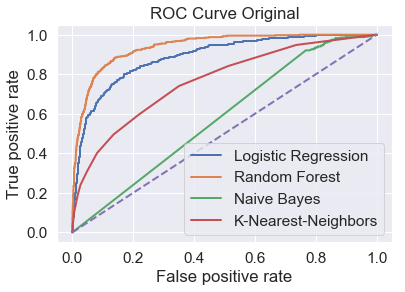

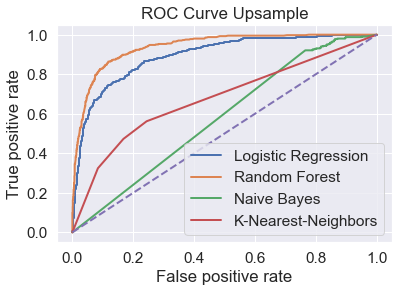

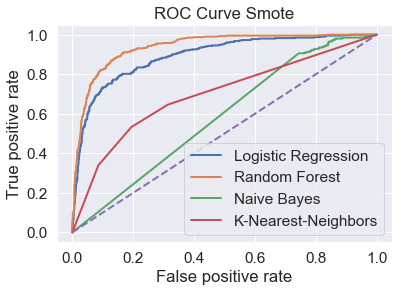

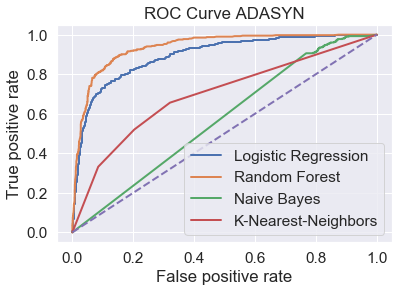

In [531]:
for sample_style, fits in fit_dict.items():
    #figure = plt.figure();
    fig,ax = plt.subplots(1);
    for fit_name, fit in fits.items():
        fpr, tpr, thresholds = roc_curve(y_test, fit.predict_proba(X_test_st)[:,1])
        plt.plot(fpr, tpr, lw = 2, label = fit_name)
    plt.plot([0,1],[0,1],ls='--', lw = 2)

    plt.legend(loc='lower right')

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve ' + sample_style);
    plt.show()
    figure.savefig(sample_style + ".png", format='png', dpi=1000 ,bbox_inches='tight')


<Figure size 432x288 with 0 Axes>

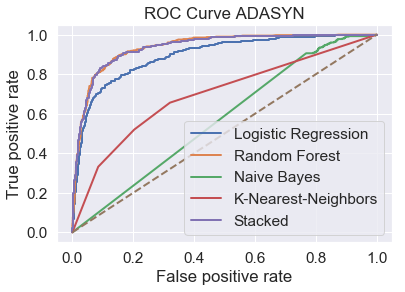

In [538]:
fit_dict['ADASYN']['Stacked'] = stacked

fig = plt.figure()
fig,ax = plt.subplots(1);
for fit_name, fit in fit_dict['ADASYN'].items():
    fpr, tpr, thresholds = roc_curve(y_test, fit.predict_proba(X_test_st)[:,1])
    plt.plot(fpr, tpr, lw = 2, label = fit_name)

plt.plot([0,1],[0,1],ls='--', lw = 2)

plt.legend(loc='lower right')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve ' + sample_style);
plt.show()
fig.savefig(sample_style + ".png", format='png', dpi=1000 ,bbox_inches='tight')


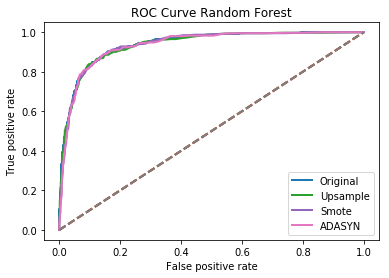

In [95]:
plt.figure();

for sample_style, fits in fit_dict.items():
    fpr, tpr, thresholds = roc_curve(y_test, fits['Random Forest'].predict_proba(X_test_st)[:,1])
    plt.plot(fpr, tpr, lw = 2, label = sample_style)

    plt.plot([0,1],[0,1],ls='--', lw = 2)

    plt.legend(loc='lower right')

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC Curve Random Forest');

plt.show()


In [97]:
stacked = StackingClassifier(
    classifiers=[fit for fitname, fit in fit_dict['ADASYN'].items()], meta_classifier=LogisticRegression(), use_probas=True)

In [98]:
stacked.fit(X_train_st, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   12.9s finished


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   35.3s finished
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


StackingClassifier(average_probas=False,
          classifiers=[GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=2000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
      ...re_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='roc_auc', verbose=1)],
          meta_classifier=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          store_train_meta_features=False, use_clones=True,
          use_features_in_secondary=False, use_probas=True, verbose=0)

In [99]:
print_summary(stacked,X_test_st,y_test)

f1 score: 0.7023498694516971
precision score: 0.7430939226519337
recall score: 0.6658415841584159
log loss: 3.193396342498234
roc auc: 0.8103698706437084
conf matrix: 
 [[1969   93]
 [ 135  269]]


In [101]:
print_summary(fit_dict['ADASYN']['Random Forest'],X_test_st,y_test)

f1 score: 0.7374562427071178
precision score: 0.6975717439293598
recall score: 0.7821782178217822
log loss: 3.151392633293934
roc auc: 0.8578689343231122
conf matrix: 
 [[1925  137]
 [  88  316]]


In [330]:
best_model = fit_dict['ADASYN']['Random Forest'].best_estimator_
logistic_model = fit_dict['ADASYN']['Logistic Regression'].best_estimator_
best_no_bootstrap_model = fit_dict['Original']['Random Forest'].best_estimator_

In [577]:
important_features = pd.Series(best_model.feature_importances_).nlargest(15)
print(important_features)
impf_index = important_features.index

for i in impf_index:
    print(X.columns[i])

8     0.324397
0     0.075064
7     0.067681
5     0.066543
4     0.060288
1     0.050687
6     0.042534
17    0.035042
2     0.032318
47    0.021905
3     0.020554
10    0.017773
20    0.016461
67    0.016253
16    0.015052
dtype: float64
PageValues
Administrative
ExitRates
ProductRelated_Duration
ProductRelated
Administrative_Duration
BounceRates
Month_Nov
Informational
TrafficType_2
Informational_Duration
Weekend
OperatingSystems_2
VisitorType_Returning_Visitor
Month_May


In [339]:
probs = best_model.predict_proba(X_test_st)[:,1]
reals = np.array(y_test)
probs_big = probs[probs>.2]
reals_big = reals[probs>.2]

In [340]:
pos_probs = probs[reals]
pos_probs_big = probs_big[reals_big]
neg_probs = probs[np.invert(reals)]
neg_probs_big = probs_big[np.invert(reals_big)]

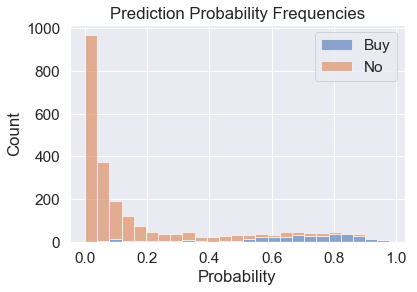

In [341]:
figure = plt.figure();

plt.hist([pos_probs, neg_probs], bins=25, alpha=.6, stacked = True);
#plt.grid(False)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.title('Prediction Probability Frequencies');
plt.legend(["Buy","No"]);

figure.savefig("probhist.png", format='png', dpi=1000 ,bbox_inches='tight')

#plt.axvline(.63, linewidth=3)

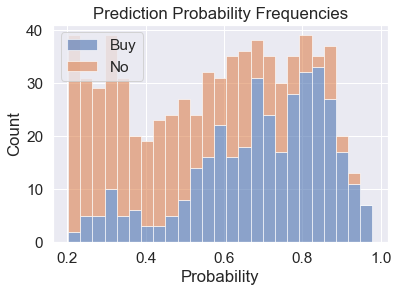

In [342]:
figure = plt.figure();

plt.hist([pos_probs_big, neg_probs_big], bins=25, alpha=.6, stacked = True);
#plt.grid(False)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.title('Prediction Probability Frequencies');
plt.legend(["Buy","No"]);

figure.savefig("probhist_big.png", format='png', dpi=1000 ,bbox_inches='tight')

#plt.axvline(.63, linewidth=3)

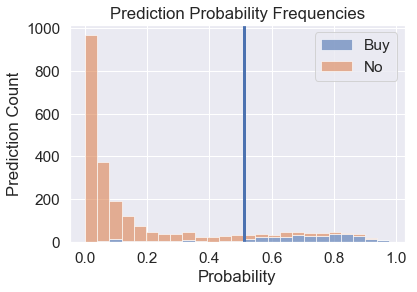

In [550]:
figure = plt.figure();
plt.hist([pos_probs, neg_probs], bins=25, alpha=.6, stacked = True);
#plt.grid(False)
plt.xlabel('Probability')
plt.ylabel('Prediction Count')
plt.title('Prediction Probability Frequencies');
plt.legend(["Buy","No"]);

plt.axvline(.51, linewidth=3)

figure.savefig("probhist3.png", format='png', dpi=1000 ,bbox_inches='tight')

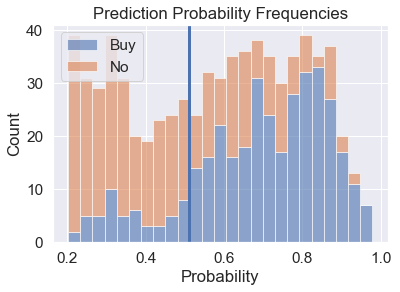

In [549]:
figure = plt.figure();

plt.hist([pos_probs_big, neg_probs_big], bins=25, alpha=.6, stacked = True);
#plt.grid(False)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.title('Prediction Probability Frequencies');
plt.legend(["Buy","No"]);
plt.axvline(.51, linewidth=3)

figure.savefig("probhist_big3.png", format='png', dpi=1000 ,bbox_inches='tight')

#plt.axvline(.63, linewidth=3)

In [574]:
# optimizing threshold
probabilities = best_model.predict_proba(X_test_st)[:,1]
reals = y_test
best_cost = -10**10
best_thresh = 0

costs = {
    'tp': 3,
    'fp': -4,
    'tn': 7,
    'fn': -5
}

# costs = {
#     'tp': 100,
#     'fp': -1,
#     'tn': 4,
#     'fn': -7
# }

# costs = {
#     'tp': 0,
#     'fp': -5,
#     'tn': 0,
#     'fn': -7
# }

for threshold in np.linspace(0,1,101):
    predictions = probabilities >= threshold
    tp = sum((reals == 1) & (predictions == 1))
    fp = sum((reals == 0) & (predictions == 1))
    tn = sum((reals == 0) & (predictions == 0))
    fn = sum((reals == 1) & (predictions == 0))
    cost = tp*costs['tp'] + fp*costs['fp'] + tn*costs['tn'] + fn*costs['fn']
    if cost > best_cost:
        best_cost = cost
        best_thresh = threshold
    #print(f'cost is {cost} and threshold is {threshold}')
    #print(f'tp is {tp}, fp is {fp}, tn is {tn}, fn is {fn}')
        
print(f'Optimal threshold is: {best_thresh} with cost of {best_cost}')

Optimal threshold is: 0.67 with cost of 13548


In [578]:
len(y_test)

2466

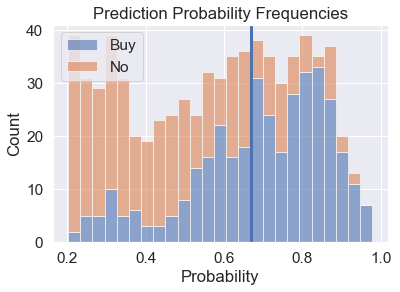

In [370]:
plt.hist([pos_probs_big, neg_probs_big], bins=25, alpha=.6, stacked = True);
#plt.grid(False)
plt.xlabel('Probability')
plt.ylabel('Count')
plt.title('Prediction Probability Frequencies');
plt.legend(["Buy","No"]);
plt.axvline(.67, linewidth=3)

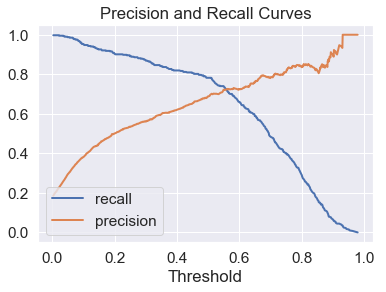

In [546]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, best_model.predict_proba(X_test_st)[:,1])
plt.plot(threshold_curve, recall_curve[1:,], lw = 2, label = "recall")
plt.plot(threshold_curve, precision_curve[1:,], lw = 2, label = "precision")

plt.legend(loc='lower left')

plt.xlabel('Threshold')
plt.title('Precision and Recall Curves');

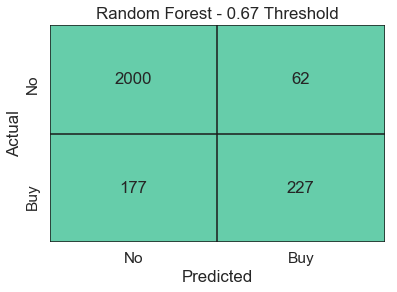

In [575]:
sns.set(font_scale=1.4)

color_order = ['xkcd:light maroon', 'xkcd:ocean']


heatmap = sns.heatmap(confusion_matrix(y_test,best_model.predict_proba(X_test_st)[:,1] >= .67),
                      annot=True,
                      cmap=ListedColormap(['mediumaquamarine']),
                      fmt="d",
                      xticklabels=['No','Buy'],
                      yticklabels=['No','Buy'],
                      cbar=False
                     )

plt.xlabel('Predicted');
plt.ylabel('Actual');
plt.title('Random Forest - 0.67 Threshold');
#heatmap.invert_yaxis();
#heatmap.invert_xaxis();
heatmap.hlines([0, 1, 2], 0, 2);
heatmap.vlines([0, 1, 2], 0, 2);
heatmap.get_figure().savefig("confmatrix.png", format='png', dpi=1000 ,bbox_inches='tight',cmap=color_order)


In [547]:
for sample_style, fits in fit_dict.items():
    for fit_name, fit in fits.items():
        #if fit_name == "Random Forest":
        print(sample_style)
        print(fit_name)
        print_summary(fit,X_test_st,y_test)

Original
Logistic Regression
f1 score: 0.48821548821548816
precision score: 0.7631578947368421
recall score: 0.3589108910891089
log loss: 4.2578361743459885
roc auc: 0.668543709366087
conf matrix: 
 [[2017   45]
 [ 259  145]]
Original
Random Forest
f1 score: 0.6599131693198264
precision score: 0.794425087108014
recall score: 0.5643564356435643
log loss: 3.291427262389454
roc auc: 0.7678717192766803
conf matrix: 
 [[2003   59]
 [ 176  228]]
Original
Naive Bayes
f1 score: 0.30703789636504253
precision score: 0.18194317140238314
recall score: 0.9826732673267327
log loss: 25.09931653734503
roc auc: 0.5585044319174886
conf matrix: 
 [[ 277 1785]
 [   7  397]]
Original
K-Nearest-Neighbors
f1 score: 0.19396551724137934
precision score: 0.75
recall score: 0.11138613861386139
log loss: 5.238245890372283
roc auc: 0.5520558239141082
conf matrix: 
 [[2047   15]
 [ 359   45]]
Upsample
Logistic Regression
f1 score: 0.6240988671472709
precision score: 0.5343915343915344
recall score: 0.75
log loss: 5

In [573]:
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [491]:
a = best_model.predict(X_test_st)